# Pacing Strategies and Performance Analysis

**3. Pace Analysis and Consistency:**
   - **Subheading: "Pace Consistency Over Time"**
     - Visualization: Line chart showing individual or grouped participant pace at each interval checkpoint.
   - **Subheading: "Pace Deviation Analysis"**
     - Visualization: Box plot or violin plot showing the distribution of pace deviation from the average pace.

**4. Gender and Category Pacing Differences:**
   - **Subheading: "Gender-Based Pacing Analysis"**
     - Visualization: Line chart comparing pace across different intervals for male and female participants.
   - **Subheading: "Category-Based Pacing Analysis"**
     - Visualization: Line chart comparing pace across different intervals for different age groups or categories.

**5. Pacing Strategies and Performance Correlation:**
   - **Subheading: "Pacing Strategy Analysis"**
     - Visualization: Scatter plot showing the relationship between pace consistency and overall performance.
   - **Subheading: "Pacing Variability Impact"**
     - Visualization: Heatmap or correlation plot showing the impact of pacing variability on final performance metrics.

**6. Checkpoint Pace Comparison:**
   - **Subheading: "Checkpoint Pace Analysis"**
     - Visualization: Line chart or area chart showing the pace at each checkpoint for different groups.

**7. Time Analysis by Race Segment:**
   - **Subheading: "Segment-wise Pace Analysis"**
     - Visualization: Line chart or area chart showing the pace for each segment of the race course.


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
plot_colors = {'2O-Bl':'#1f2649',
          '2O-Or':'#e87f33'}


In [229]:
df = pd.read_csv('data/raw/56km_results.csv')

In [230]:
df.head()

,Page No,Pos,Name,Time,Medal,Club,Gender,Category,Start,5km,14km,28km,42.2km,50km
0,1,1.0,ONALENNA KHONKHOBE,03:09:30,Gold,NEDBANK DEVELOPMENT CLUB CENTRAL NORTH WEST,Male,Senior,05:15:04,00:17:38,00:48:12,01:36:39,02:25:21,02:52:00
1,1,2.0,LLOYD BOSMAN,03:09:58,Gold,NEDBANK RUNNING CLUB SOUTH WESTERN DISTRICTS,Male,Senior,05:15:05,00:17:39,00:48:14,01:36:41,02:25:21,02:51:48
2,1,3.0,GIVEMORE MUDZINGANYAMA,03:11:13,Gold,NaN,Male,Senior,05:15:04,00:17:40,00:48:16,01:36:47,02:25:22,02:52:09
3,1,4.0,LEBELLO MOPENYANE,03:11:21,Gold,NaN,Male,Senior,05:15:05,00:17:53,00:48:13,01:36:40,02:25:23,02:52:04
4,1,5.0,MPHATSO NADOLO,03:11:35,Gold,NaN,Male,Senior,05:15:02,00:17:41,00:48:16,01:36:44,02:25:19,02:52:24


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229 entries, 0 to 12228
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Page No   12229 non-null  int64  
 1   Pos       10177 non-null  float64
 2   Name      12229 non-null  object 
 3   Time      12229 non-null  object 
 4   Medal     10455 non-null  object 
 5   Club      11034 non-null  object 
 6   Gender    12229 non-null  object 
 7   Category  12229 non-null  object 
 8   Start     10709 non-null  object 
 9   5km       10804 non-null  object 
 10  14km      10773 non-null  object 
 11  28km      10760 non-null  object 
 12  42.2km    10473 non-null  object 
 13  50km      10488 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


**1. Pace Distribution and Trends:**
   - **Subheading: "Overall Pace Distribution"**
     - Visualization: Histogram or box plot showing the distribution of finish times across all participants.

In [232]:
df['Time'].value_counts()

Time
Not started            1377
DNF                     384
Unofficial Finisher     291
06:51:39                 10
06:26:23                  8
                       ... 
05:06:18                  1
06:04:07                  1
06:04:08                  1
06:04:10                  1
03:09:30                  1
Name: count, Length: 6058, dtype: int64

In [233]:
# Remove "Not started", "DNF", and "Unofficial Finisher" entries from the time column
df = df[~df['Time'].isin(['Not started', 'DNF', 'Unofficial Finisher'])]

In [234]:
df['Time'].value_counts()

Time
06:51:39    10
06:26:23     8
05:59:08     7
05:35:39     7
06:28:41     7
            ..
05:29:57     1
05:29:56     1
05:29:54     1
05:29:53     1
07:12:27     1
Name: count, Length: 6055, dtype: int64

In [235]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [236]:
average_time = df['Time'].median()

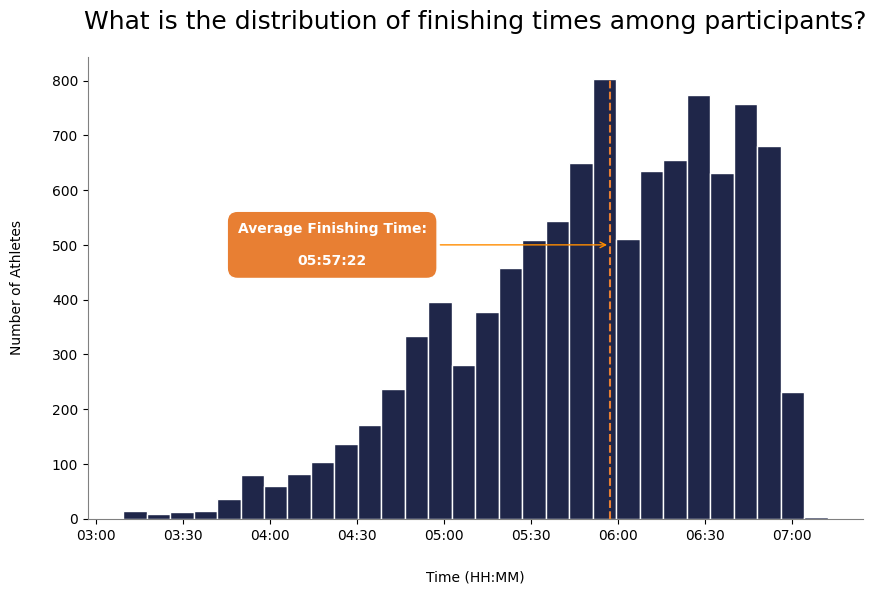

In [237]:
from matplotlib.dates import DateFormatter

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the finishing times on a histogram
ax.hist(df['Time'], bins=30, color='#1f2649', edgecolor='white', zorder=1)
ax.set_xlabel('Time (HH:MM)', labelpad=20)
ax.set_ylabel('Number of Athletes', labelpad=20)
ax.set_title('What is the distribution of finishing times among participants?', pad=20, fontsize=18)


# # Plot average time line
average_time_line = ax.axvline(average_time, color='#e87f33', linestyle='dashed', linewidth=1.5, label=f'Average Time: {average_time.strftime("%H:%M:%S")}', ymax=0.95)

# Create a 90-degree dashed line from the average time line
ax.plot([average_time, average_time], [0, 0.95], color='darkorange', linestyle='dashed', linewidth=1)

# Annotate the legend with a box
legend_box = ax.annotate(f'Average Finishing Time:\n\n{average_time.strftime("%H:%M:%S")}', color='white', xy=(average_time, 500), xycoords='data', xytext=(-200, 0), textcoords='offset points',
                         bbox=dict(boxstyle='round,pad=0.75', fc='#e87f33', ec='white', alpha=1),
                         arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0', color='darkorange'),
                         ha='center', va='center', weight='600')

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_visible(False)

# Format x-axis labels to display only time
date_format = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)


**2. Pace Comparison Across Categories:**
   - **Subheading: "Pace Comparison by Gender and Age Group"**
     - Visualization: Grouped bar chart comparing average pace across different gender and age groups.
   - **Subheading: "Club-wise Pace Comparison"**
     - Visualization: Grouped bar chart comparing pace across different clubs.

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10177 entries, 0 to 10176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Page No   10177 non-null  int64         
 1   Pos       10177 non-null  float64       
 2   Name      10177 non-null  object        
 3   Time      10177 non-null  datetime64[ns]
 4   Medal     10164 non-null  object        
 5   Club      9225 non-null   object        
 6   Gender    10177 non-null  object        
 7   Category  10177 non-null  object        
 8   Start     10046 non-null  object        
 9   5km       10139 non-null  object        
 10  14km      10126 non-null  object        
 11  28km      10160 non-null  object        
 12  42.2km    10158 non-null  object        
 13  50km      10158 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [265]:
import datetime

# Given seconds value
seconds = (df['Time'] - datetime.datetime(1900, 1, 1)).dt.total_seconds()

# Total distance covered in kilometers
distance_km = 56  # Assuming standard marathon distance

# Convert seconds to pace in minutes per kilometer
df['Pace_mins_per_km'] = seconds / 60 / distance_km

(-0.65, 5.1)

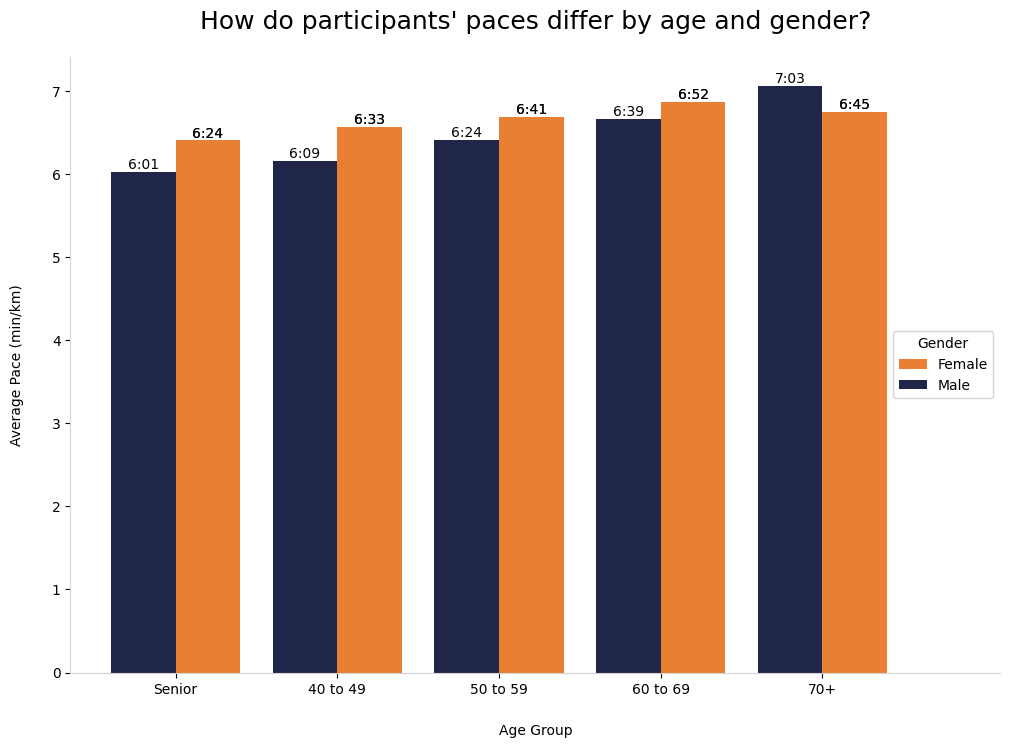

In [280]:
import matplotlib.pyplot as plt

# Define colors for male and female bars
colors = {'Male': plot_colors['2O-Bl'], 'Female': plot_colors['2O-Or']}

# Pivot the DataFrame, ensuring all age group categories are included
pivot_df = df.pivot_table(index='Category', columns='Gender', values='Pace_mins_per_km', fill_value=0)

age_group_order = ['Senior', '40 to 49', '50 to 59', '60 to 69', '70+']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))


# Plot the grouped bar chart
for i, col in enumerate(pivot_df.columns):
    bars = pivot_df[col].loc[age_group_order].plot(kind='bar', ax=ax, color=colors[col], position=i, width=0.4)
    for bar in bars.patches:
        # Get the pace value from the height of the bar
        pace_value = bar.get_height()
        
        # Convert pace to minutes and seconds
        pace_minutes = int(pace_value)  # Whole minutes
        pace_seconds = int((pace_value - pace_minutes) * 60)  # Remaining seconds

        # Format the pace as a string
        pace_string = f"{pace_minutes}:{pace_seconds:02d}"

        # Place the pace string at the top of each bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), pace_string, ha='center', va='bottom')

# Customize plot
ax.set_title("How do participants' paces differ by age and gender?", pad=20, fontsize=18)
ax.set_xlabel('Age Group', labelpad=20)
ax.set_ylabel('Average Pace (min/km)', labelpad=20)
ax.set_xticklabels(age_group_order, rotation=0)
ax.legend(title='Gender', loc='center right')

# Remove top and right spines, leave the visible ones gray
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

ax.set_xlim(-0.65, 5.1)

**3. Pace Analysis and Consistency:**
   - **Subheading: "Pace Consistency Over Time"**
     - Visualization: Line chart showing individual or grouped participant pace at each interval checkpoint.
   - **Subheading: "Pace Deviation Analysis"**
     - Visualization: Box plot or violin plot showing the distribution of pace deviation from the average pace.

In [281]:
df.columns

Index(['Page No', 'Pos', 'Name', 'Time', 'Medal', 'Club', 'Gender', 'Category',
       'Start', '5km', '14km', '28km', '42.2km', '50km', 'Pace_mins_per_km'],
      dtype='object')

In [283]:
df[['5km', '14km', '28km', '42.2km', '50km', 'Time']]

,5km,14km,28km,42.2km,50km,Time
0,00:17:38,00:48:12,01:36:39,02:25:21,02:52:00,1900-01-01 03:09:30
1,00:17:39,00:48:14,01:36:41,02:25:21,02:51:48,1900-01-01 03:09:58
2,00:17:40,00:48:16,01:36:47,02:25:22,02:52:09,1900-01-01 03:11:13
3,00:17:53,00:48:13,01:36:40,02:25:23,02:52:04,1900-01-01 03:11:21
4,00:17:41,00:48:16,01:36:44,02:25:19,02:52:24,1900-01-01 03:11:35
...,...,...,...,...,...,...
10172,00:31:32,01:26:40,02:56:16,04:52:50,06:11:48,1900-01-01 06:59:57
10173,00:31:00,01:29:51,03:09:27,05:08:54,06:18:59,1900-01-01 06:59:58
10174,00:31:41,01:32:50,03:08:10,04:56:27,06:15:38,1900-01-01 06:59:58
10175,00:29:28,01:27:06,03:07:52,05:12:59,06:25:59,1900-01-01 07:10:50


In [ ]:
import datetime

# Given seconds value
seconds = (df['Time'] - datetime.datetime(1900, 1, 1)).dt.total_seconds()

# Total distance covered in kilometers
distance_km = 56  # Assuming standard marathon distance

# Convert seconds to pace in minutes per kilometer
df['Pace_mins_per_km'] = seconds / 60 / distance_km